Final Code - Project

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"D:\Spring 2024\GT\USA imports.csv")
data
data_3 = data[['Port','Trade Volume - 2015','Trade Volume - 2016', 'Trade Volume - 2017', 'Trade Volume - 2018','Trade Volume - 2019', 'Trade Volume - 2020', 'Trade Volume - 2021','Trade Volume - 2022']]
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Port                 47 non-null     object 
 1   Trade Volume - 2015  47 non-null     float64
 2   Trade Volume - 2016  47 non-null     float64
 3   Trade Volume - 2017  47 non-null     float64
 4   Trade Volume - 2018  47 non-null     float64
 5   Trade Volume - 2019  47 non-null     float64
 6   Trade Volume - 2020  47 non-null     float64
 7   Trade Volume - 2021  47 non-null     float64
 8   Trade Volume - 2022  47 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.5+ KB


In [2]:
print("Dataset Shape:", data.shape)
print("Column Names:", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

Dataset Shape: (48, 88)
Column Names: Index(['Port', 'Location', 'Port Type', '15-Mar', '15-Jun', '15-Sep', '15-Dec',
       '16-Mar', '16-Jun', '16-Sep', '16-Dec', '17-Mar', '17-Jun', '17-Sep',
       '17-Dec', '18-Mar', '18-Jun', '18-Sep', '18-Dec', '19-Mar', '19-Jun',
       '19-Sep', '19-Dec', '20-Mar', '20-Jun', '20-Sep', '20-Dec', '21-Mar',
       '21-Jun', '21-Sep', '21-Dec', '22-Mar', '22-Jun', '22-Sep', '22-Dec',
       'Trading Partners - 1', 'Trading Partners - 2', 'Trading Partners - 3',
       'Trading Partners - 4', 'Trading Partners - 5', 'Trade Volume - 2015',
       'Trade Volume - 2016', 'Trade Volume - 2017', 'Trade Volume - 2018',
       'Trade Volume - 2019', 'Trade Volume - 2020', 'Trade Volume - 2021',
       'Trade Volume - 2022', 'Trade Volume - Partner 1 - 2015',
       'Trade Volume - Partner 1 - 2016', 'Trade Volume - Partner 1 - 2017',
       'Trade Volume - Partner 1 - 2018', 'Trade Volume - Partner 1 - 2019',
       'Trade Volume - Partner 1 - 2020', 'Tra

NameError: name 'Data_connected' is not defined

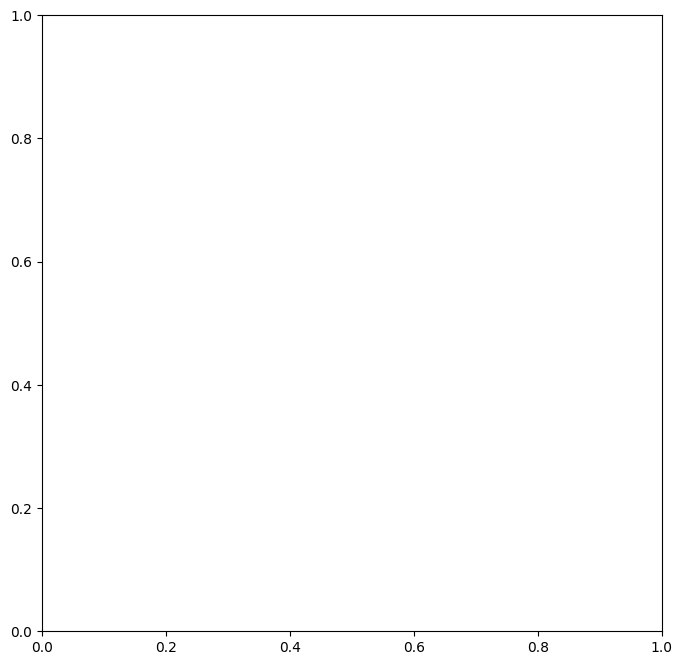

In [3]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Trading Partners - 1'].value_counts()
    for x_label, grp in Data_connected.groupby('Port Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Port Type')
_ = plt.ylabel('Trading Partners - 1')

Data_connected.groupby('Port Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

         Air    Land      Sea  Grand Total
Year                                      
2015  460691  426667   834118      1721476
2016  447098  415581   798936      1661615
2017  505953  433225   889807      1828985
2018  555578  457482   953421      1966481
2019  538867  431294   875176      1845337
2020  435170  351831   755756      1542757
2021  617477  463134  1000826      2081437
2022  780229  588910  1040021      2409160


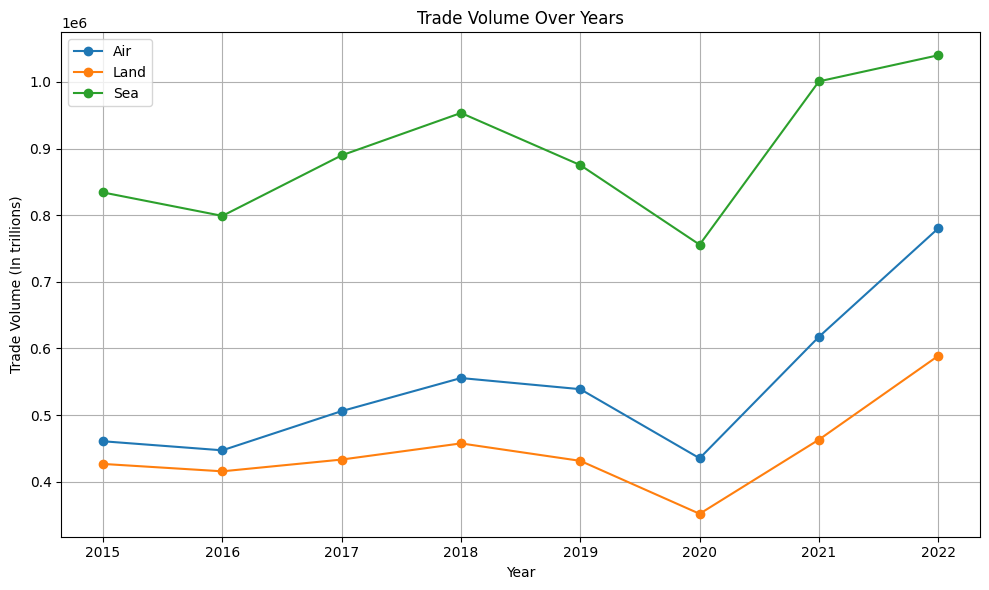

In [4]:
import pandas as pd


data_port_type = {
    'Year': ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    'Air': [460691, 447098, 505953, 555578, 538867, 435170, 617477, 780229],
    'Land': [426667, 415581, 433225, 457482, 431294, 351831, 463134, 588910],
    'Sea': [834118, 798936, 889807, 953421, 875176, 755756, 1000826, 1040021],
    'Grand Total': [1721476, 1661615, 1828985, 1966481, 1845337, 1542757, 2081437, 2409160]
}


df = pd.DataFrame(data_port_type)


df.set_index('Year', inplace=True)


print(df)
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))

# Plot lines for each type of trade volume
plt.plot(df.index, df['Air'], marker='o', label='Air')
plt.plot(df.index, df['Land'], marker='o', label='Land')
plt.plot(df.index, df['Sea'], marker='o', label='Sea')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Trade Volume (In trillions)')
plt.title('Trade Volume Over Years')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


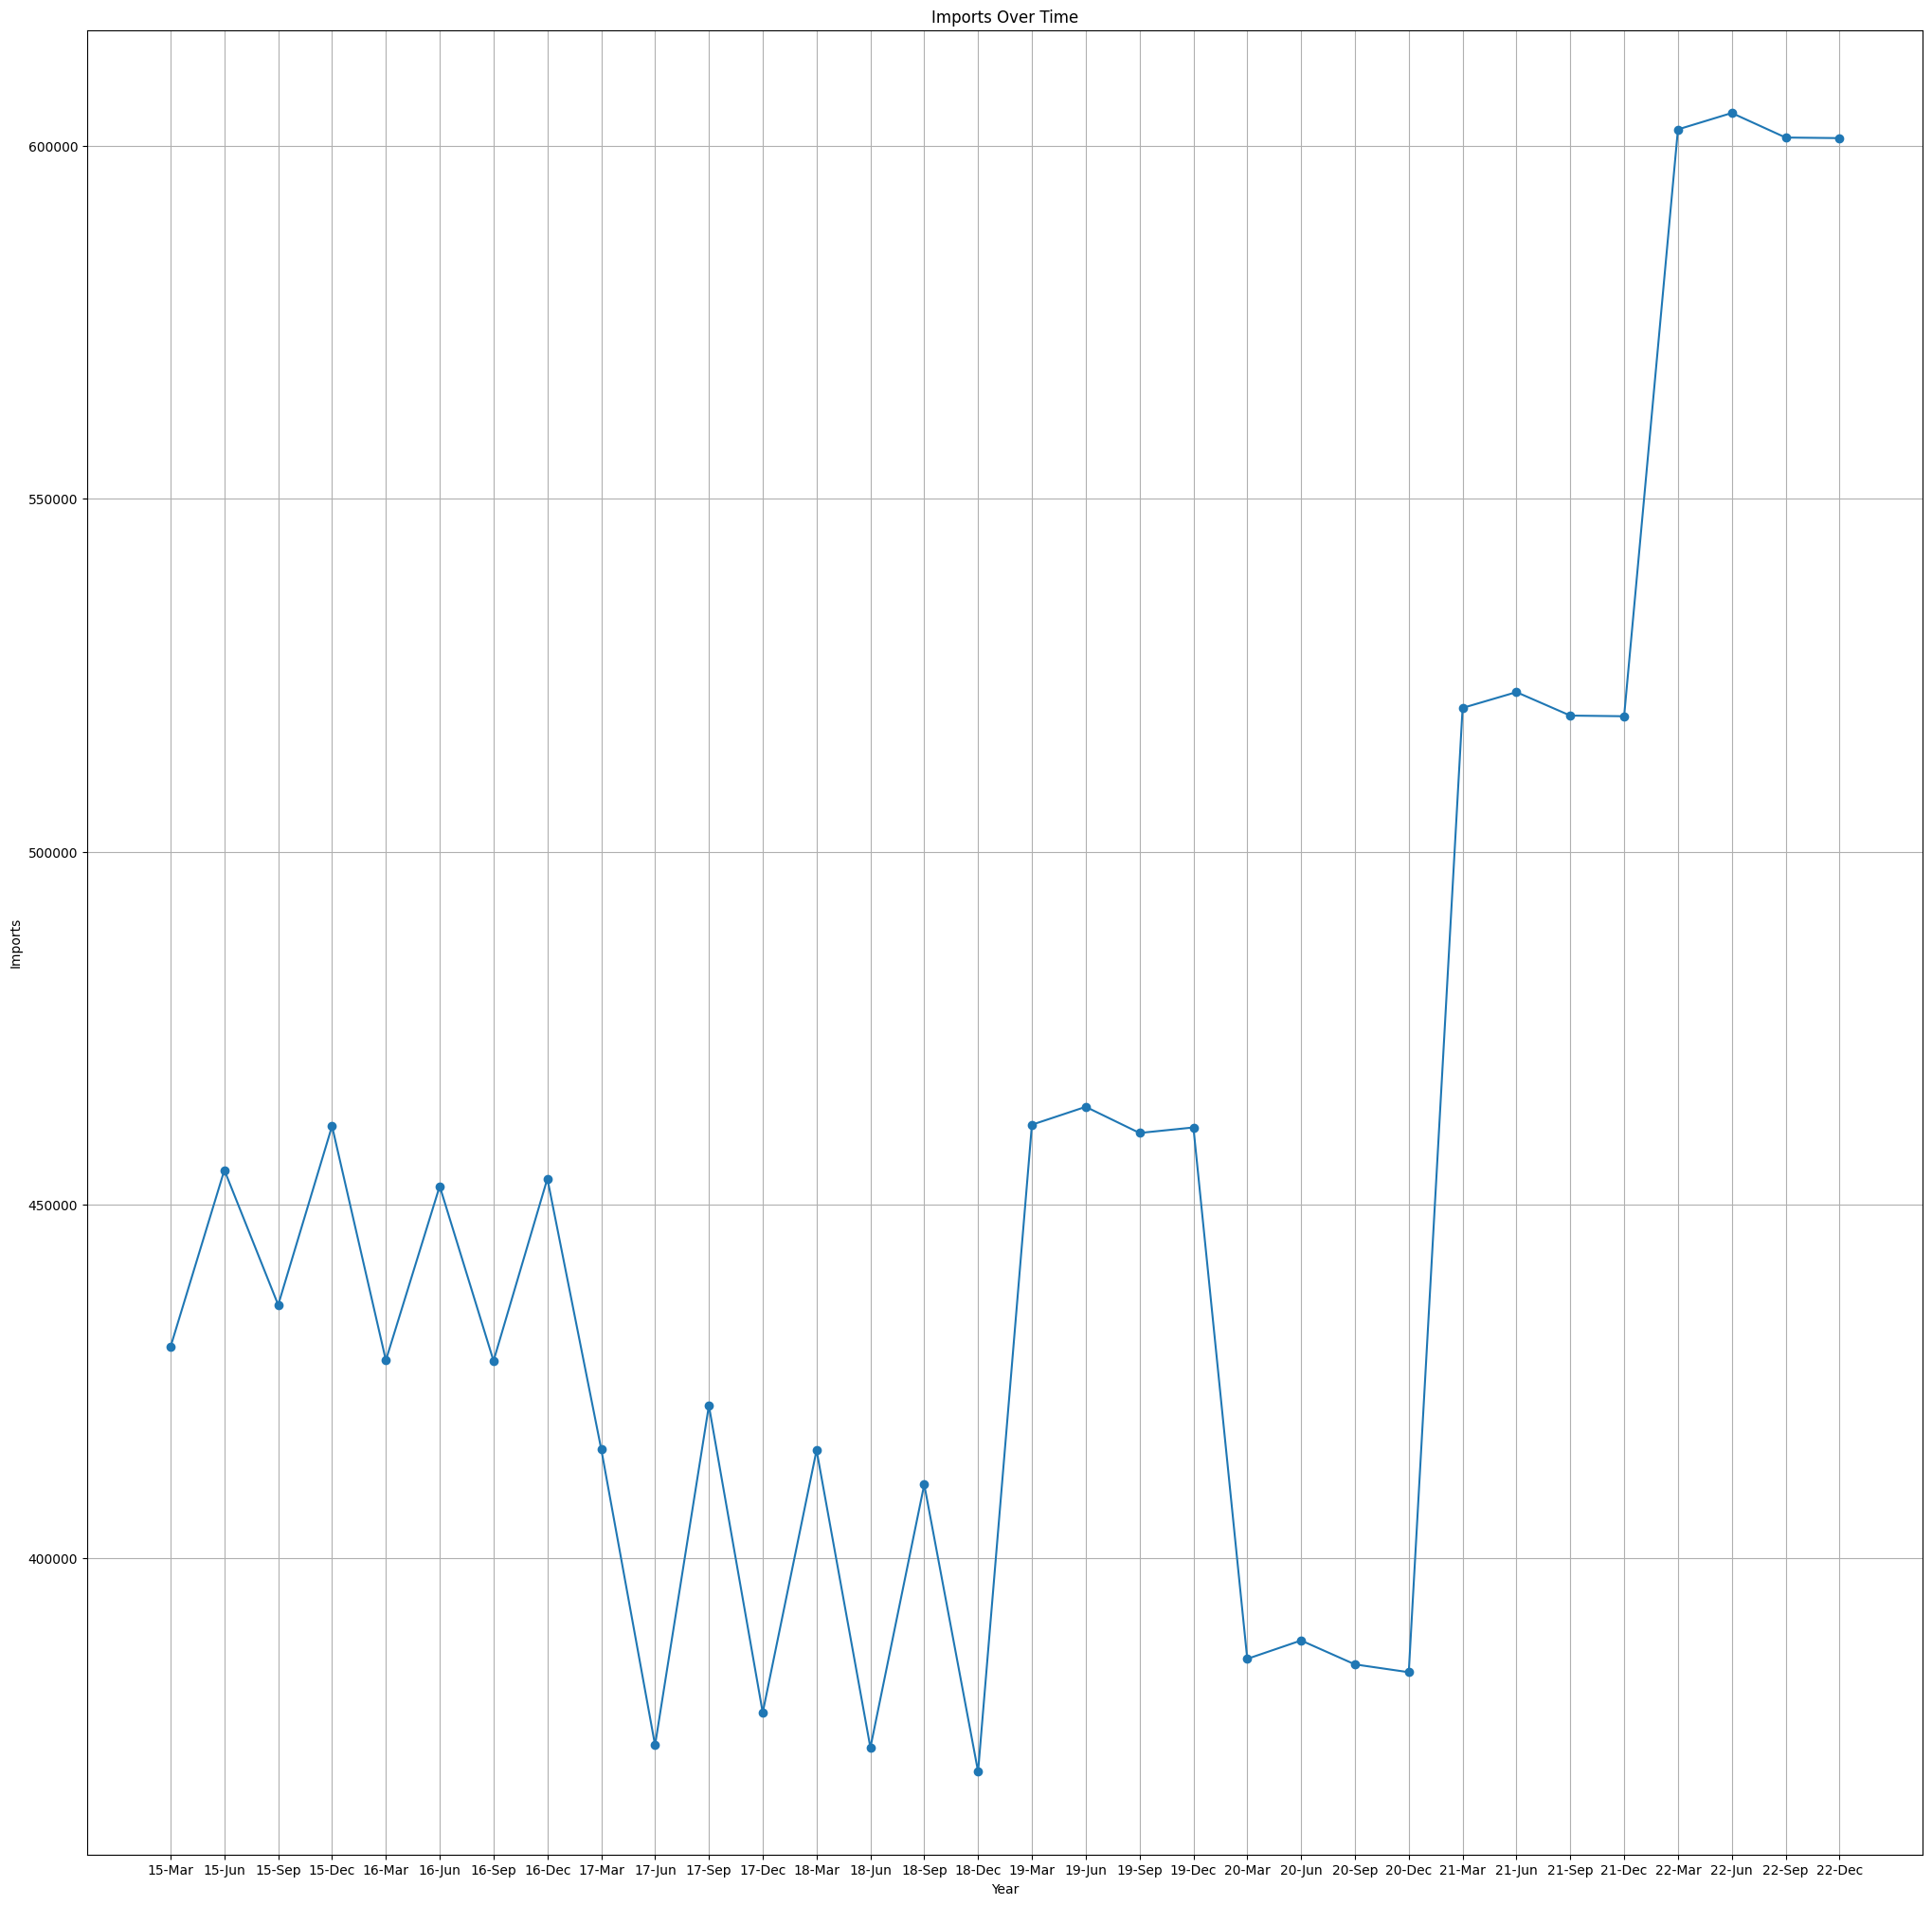

In [27]:
data_2 = pd.read_csv(r"D:\Spring 2024\GT\USA imports 2.csv")

plt.figure(figsize=(25, 25))
plt.plot(data_2['Year'], data_2['Imports'], marker='o', linestyle='-')
plt.title('Imports Over Time')
plt.xlabel('Year')
plt.ylabel('Imports')
plt.grid(True)
plt.show()

In [4]:

G = nx.Graph()


ports = data['Port'].unique()
trading_partners_columns = ['Trading Partners - 1', 'Trading Partners - 2', 'Trading Partners - 3', 'Trading Partners - 4', 'Trading Partners - 5']
trading_partners = data[trading_partners_columns].values.flatten()
nodes = list(set(list(ports) + list(trading_partners)))
G.add_nodes_from(nodes)


for index, row in data.iterrows():
    port = row['Port']
    for trading_partner_col in trading_partners_columns:
        trading_partner = row[trading_partner_col]
        if not pd.isna(trading_partner):
            for year in range(2015, 2023):
                trade_volume_col = f'Trade Volume - Partner {trading_partner_col.split(" - ")[-1]} - {year}'
                trade_volume = row[trade_volume_col]
                if not pd.isna(trade_volume):
                    G.add_edge(port, trading_partner, weight=trade_volume)


print("Number of nodes (ports and trading partners):", G.number_of_nodes())
print("Number of edges (trade relationships):", G.number_of_edges())

import itertools


port_combinations = list(itertools.combinations(ports, 2))


for port_a, port_b in port_combinations:
    common_trading_partners = nx.common_neighbors(G, port_a, port_b)
    print(f"Common trading partners between {port_a} and {port_b}: {list(common_trading_partners)}")



edge_weights = nx.get_edge_attributes(G, 'weight')
print("Edge weights:", edge_weights)


communities = nx.algorithms.community.greedy_modularity_communities(G)
print("Communities:", communities)


Number of nodes (ports and trading partners): 61
Number of edges (trade relationships): 226
Common trading partners between Los Angeles and Houston: ['China', 'Germany']
Common trading partners between Los Angeles and New York City: ['China', 'Vietnam', 'Germany']
Common trading partners between Los Angeles and Savannah: ['China', 'Vietnam', 'Germany']
Common trading partners between Los Angeles and Long Beach: ['China', 'Japan', 'Vietnam', 'Germany']
Common trading partners between Los Angeles and Los Angeles International Airport: ['China', 'Japan', 'Vietnam', 'Germany']
Common trading partners between Los Angeles and Chicago O'Hare International Airport: ['China', 'Japan', 'Germany']
Common trading partners between Los Angeles and JFK International Airport: ['China', 'Germany']
Common trading partners between Los Angeles and Detroit: ['China', 'Japan', 'Germany']
Common trading partners between Los Angeles and Laredo: ['China', 'Japan', 'Germany']
Common trading partners between Los

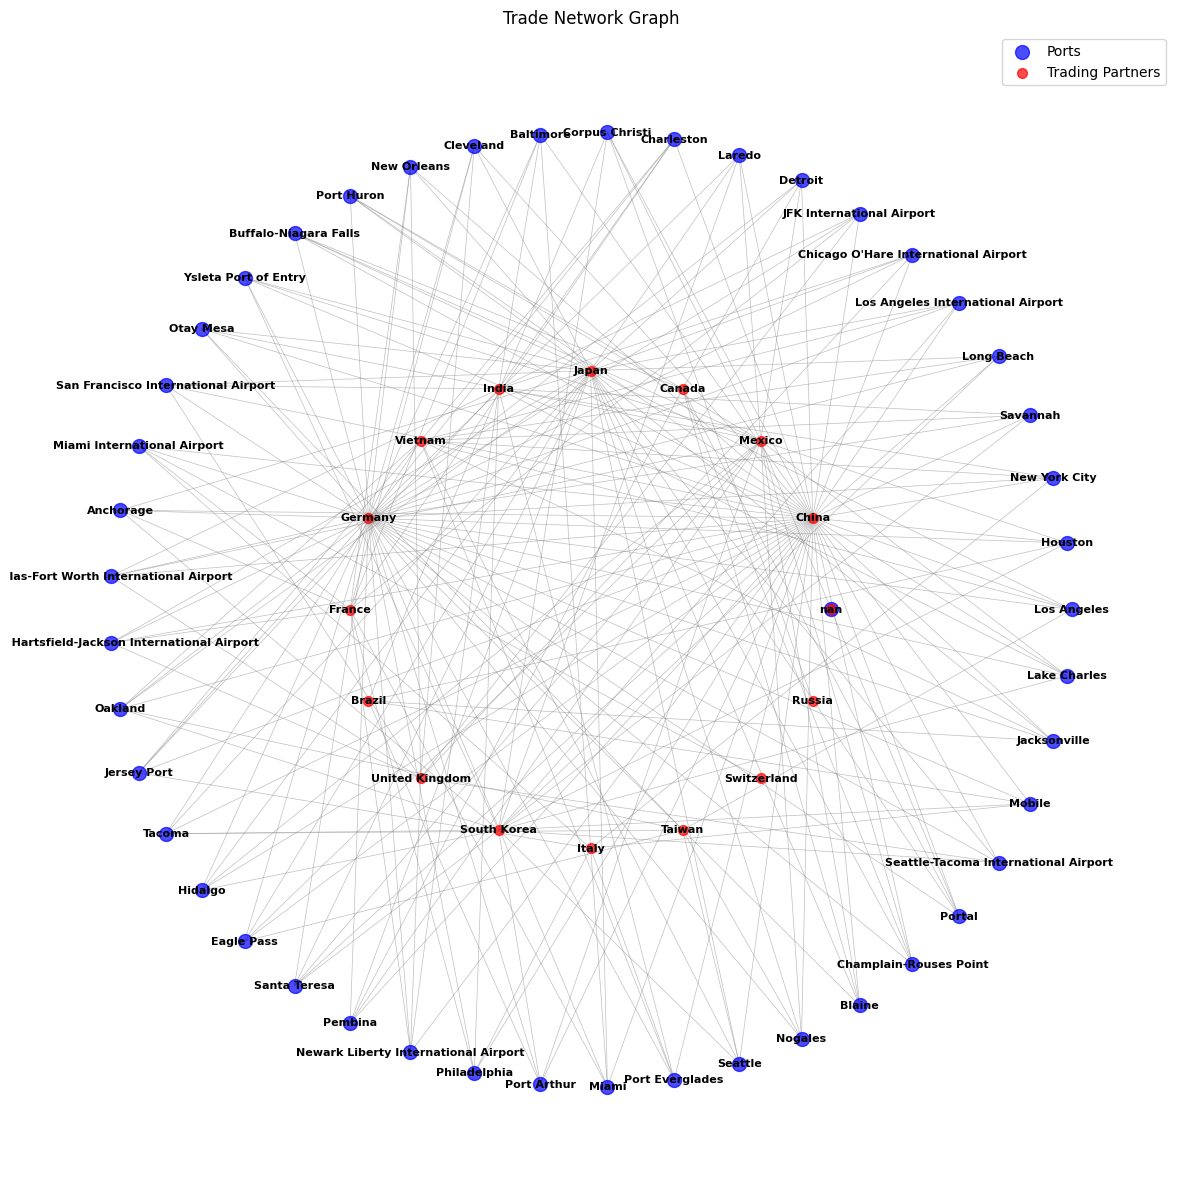

Number of nodes (ports and trading partners): 61
Number of edges (trade relationships): 226


In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

ports = data['Port'].unique()
trading_partners = pd.unique(data[['Trading Partners - 1', 'Trading Partners - 2', 'Trading Partners - 3', 'Trading Partners - 4', 'Trading Partners - 5']].values.ravel('K'))


G = nx.Graph()


G.add_nodes_from(ports, layer='outer')
G.add_nodes_from(trading_partners, layer='inner')


for index, row in data.iterrows():
    port = row['Port']
    
    for i in range(1, 6):
        trading_partner = row[f'Trading Partners - {i}']
        
        if pd.notna(trading_partner):
            
            trade_volumes = row[[f'Trade Volume - Partner {i} - {year}' for year in range(2015, 2023)]].sum()
            
            G.add_edge(port, trading_partner, weight=trade_volumes)


outer_circle = nx.circular_layout([node for node in G.nodes if G.nodes[node]['layer'] == 'outer'], scale=1)
inner_circle = nx.circular_layout([node for node in G.nodes if G.nodes[node]['layer'] == 'inner'], scale=0.5)


pos = {**outer_circle, **inner_circle}


plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, nodelist=ports, node_color='blue', node_size=100, alpha=0.7, label='Ports')
nx.draw_networkx_nodes(G, pos, nodelist=trading_partners, node_color='red', node_size=50, alpha=0.7, label='Trading Partners')
nx.draw_networkx_edges(G, pos, edge_color='grey', width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', font_color='black')

plt.title('Trade Network Graph')
plt.legend()
plt.axis('off')
plt.show()

print("Number of nodes (ports and trading partners):", G.number_of_nodes())
print("Number of edges (trade relationships):", G.number_of_edges())

Degree Centrality: {'Los Angeles': 0.0819672131147541, 'Houston': 0.0819672131147541, 'New York City': 0.0819672131147541, 'Savannah': 0.0819672131147541, 'Long Beach': 0.0819672131147541, 'Los Angeles International Airport': 0.0819672131147541, "Chicago O'Hare International Airport": 0.0819672131147541, 'JFK International Airport': 0.0819672131147541, 'Detroit': 0.0819672131147541, 'Laredo': 0.0819672131147541, 'Charleston': 0.0819672131147541, 'Corpus Christi': 0.0819672131147541, 'Baltimore': 0.0819672131147541, 'Cleveland': 0.0819672131147541, 'New Orleans': 0.0819672131147541, 'Port Huron': 0.0819672131147541, 'Buffalo-Niagara Falls': 0.0819672131147541, 'Ysleta Port of Entry': 0.0819672131147541, 'Otay Mesa': 0.0819672131147541, 'San Francisco International Airport': 0.0819672131147541, 'Miami International Airport': 0.0819672131147541, 'Anchorage': 0.0819672131147541, 'Dallas-Fort Worth International Airport': 0.0819672131147541, 'Atlanta Hartsfield-Jackson International Airport

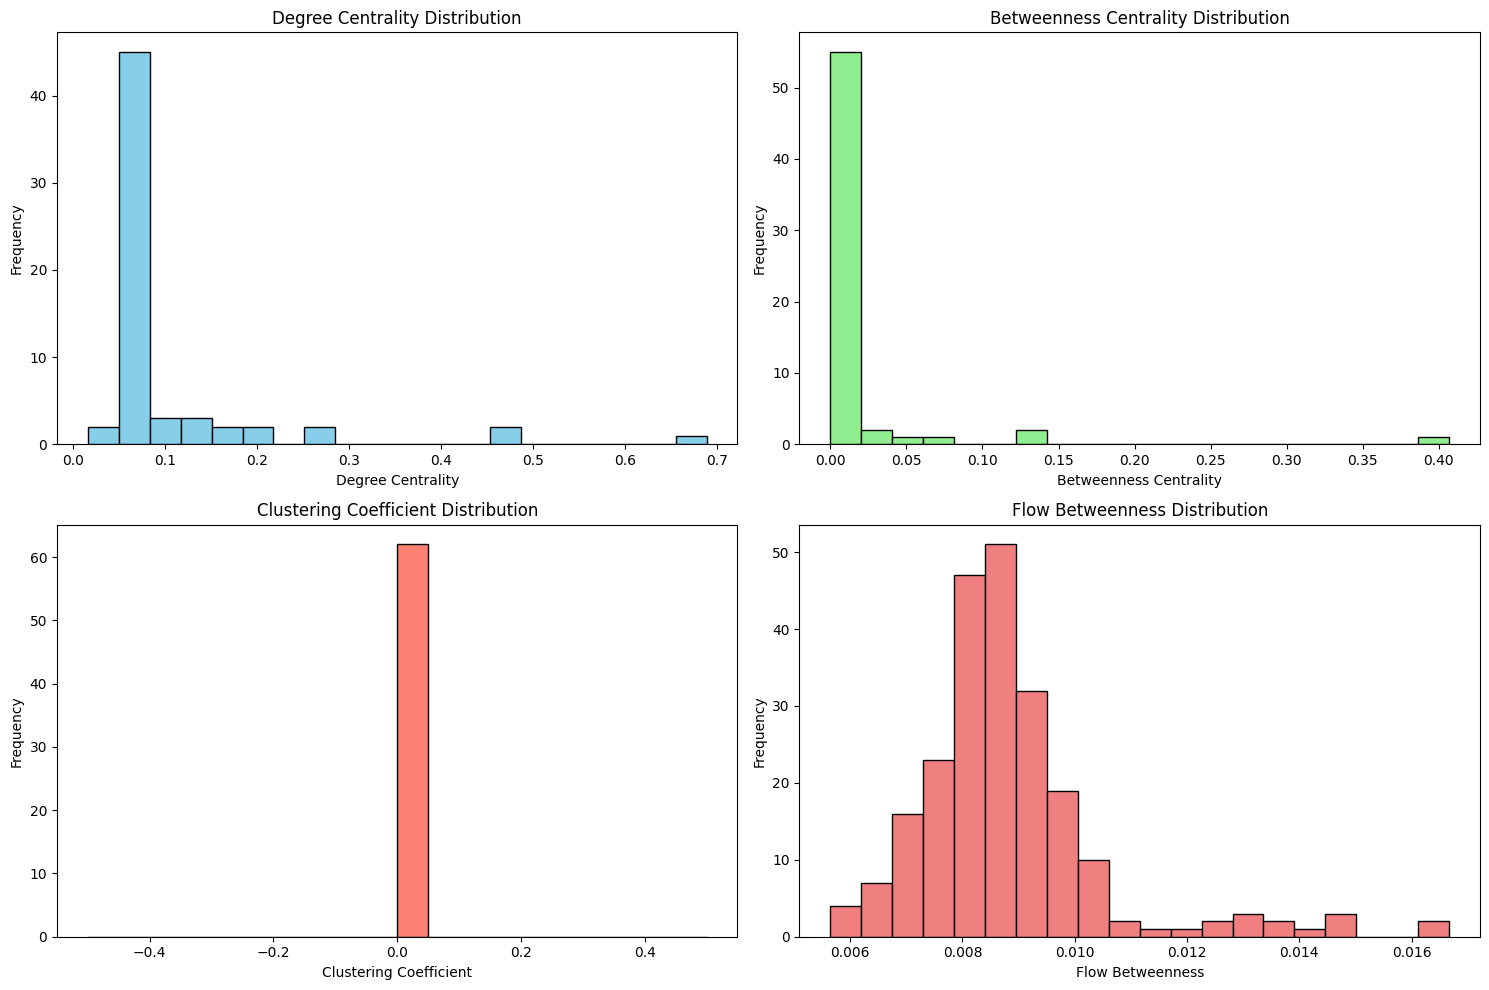

In [36]:
import networkx as nx

# Assuming G is your graph object

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# Calculate Flow Betweenness
# Note: Flow betweenness can be computationally intensive on large graphs
flow_betweenness = nx.edge_current_flow_betweenness_centrality(G)

# You can now print these metrics or analyze them further
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Clustering Coefficient:", clustering_coefficient)
print("Flow Betweenness:", flow_betweenness)

plt.figure(figsize=(15, 10))

# Degree Centrality
plt.subplot(221)
plt.hist(degree_centrality.values(), bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

# Betweenness Centrality
plt.subplot(222)
plt.hist(betweenness_centrality.values(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

# Clustering Coefficient
plt.subplot(223)
plt.hist(clustering_coefficient.values(), bins=20, color='salmon', edgecolor='black')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

# Flow Betweenness
plt.subplot(224)
plt.hist(flow_betweenness.values(), bins=20, color='lightcoral', edgecolor='black')
plt.title('Flow Betweenness Distribution')
plt.xlabel('Flow Betweenness')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


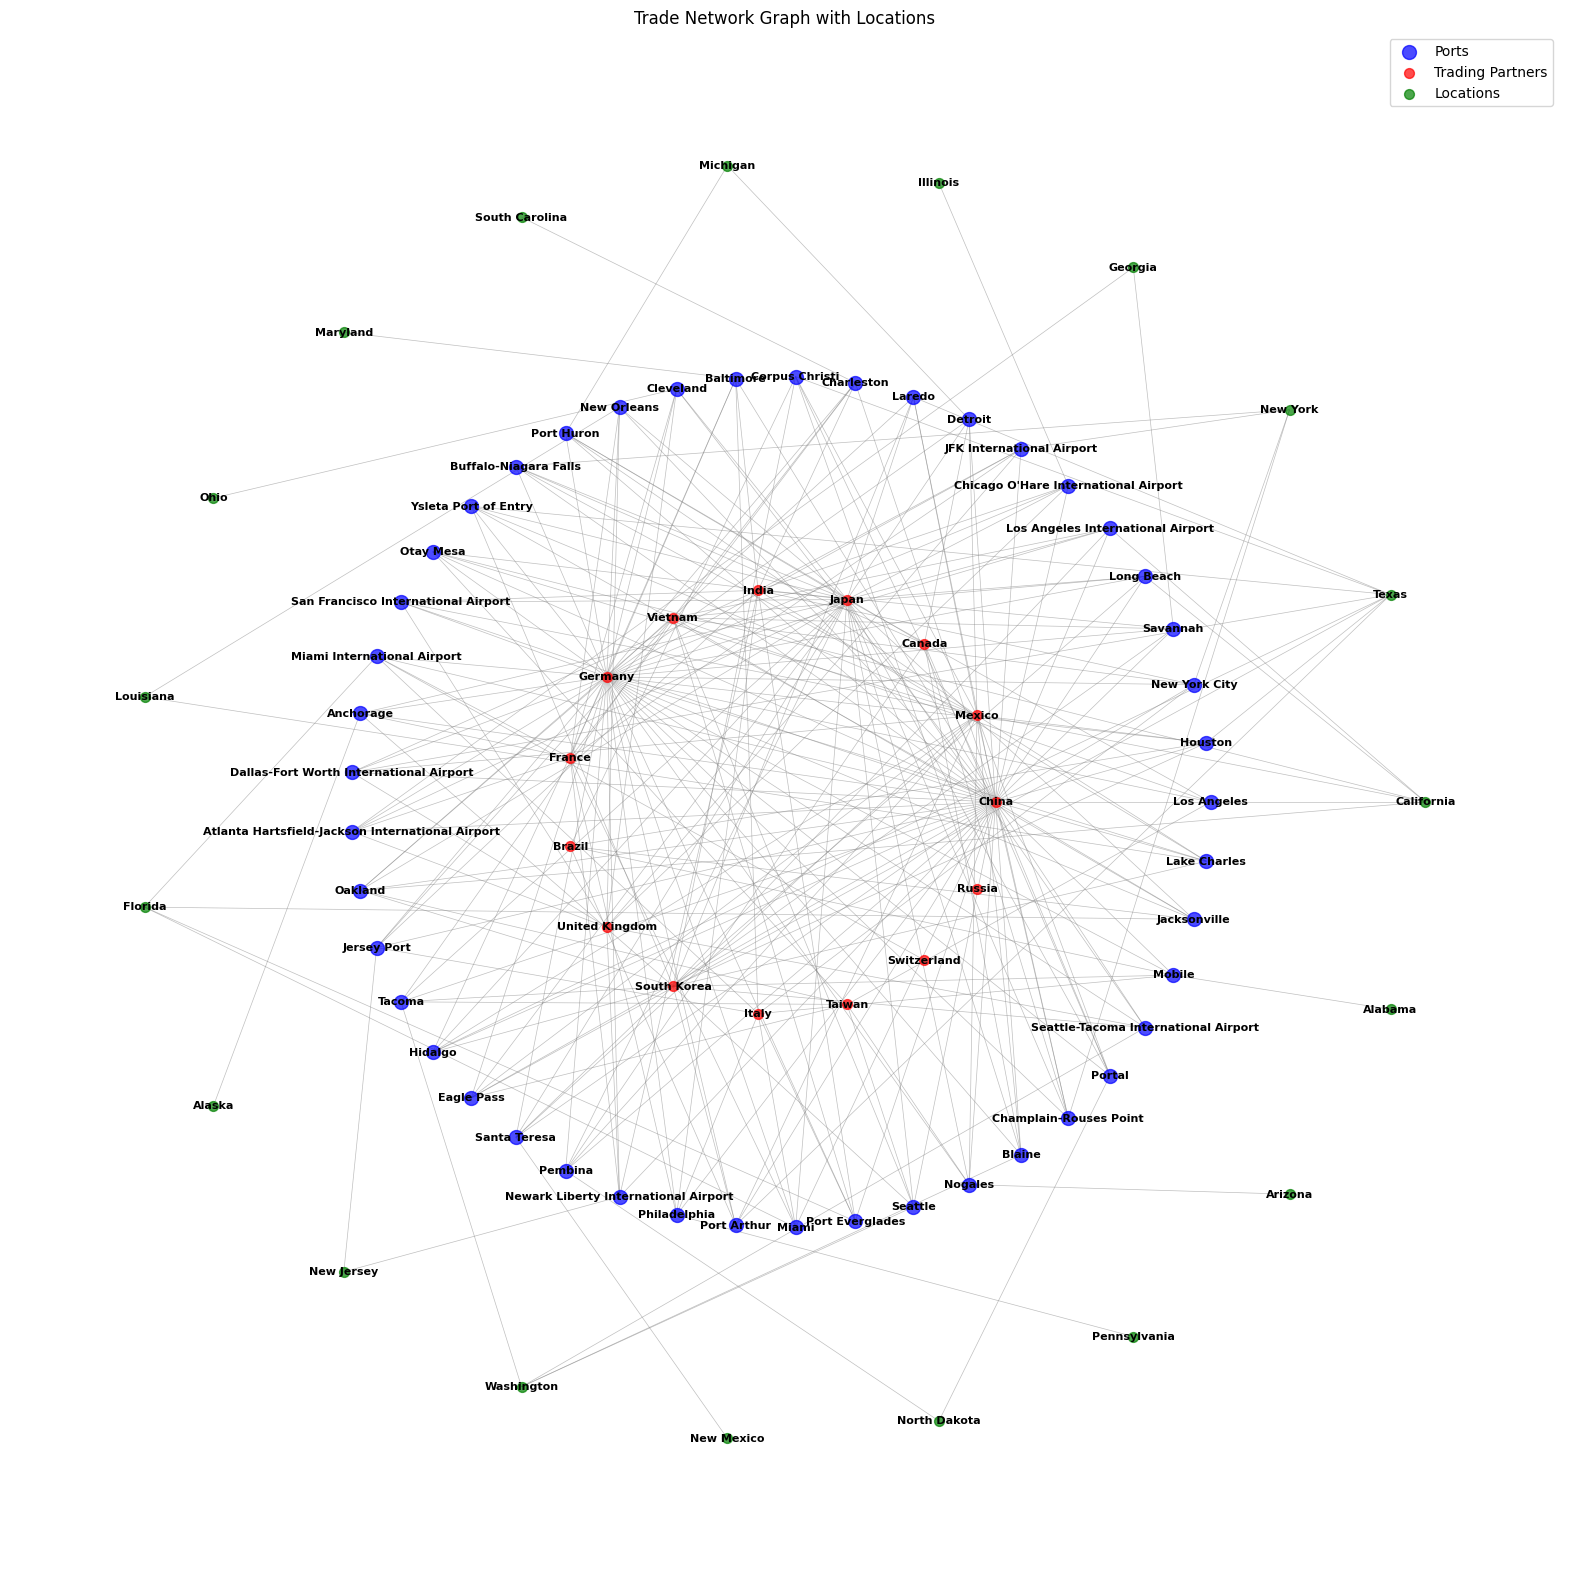

The graph has **79 nodes** and **271 edges**.
Top 10 Countries based on Degree Centrality:
China: 0.5769230769230769
Germany: 0.5384615384615384
Japan: 0.3717948717948718
Mexico: 0.24358974358974358
South Korea: 0.21794871794871795
India: 0.16666666666666666
Vietnam: 0.15384615384615385
France: 0.14102564102564102
United Kingdom: 0.11538461538461538
Italy: 0.10256410256410256

Top 10 Countries based on Betweenness Centrality:
China: 0.3399576333222143
Germany: 0.27367987905693736
Japan: 0.09890470910625061
Mexico: 0.036968904765576835
Miami International Airport: 0.03414578611655042
South Korea: 0.03413234926777333
Mobile: 0.03396688942556977
Corpus Christi: 0.03126198347582613
Philadelphia: 0.030544106993703767
Baltimore: 0.030544106993703763

Top 10 Ports based on Clustering Coefficient:
Los Angeles: 0
Houston: 0
New York City: 0
Savannah: 0
Long Beach: 0
Los Angeles International Airport: 0
Chicago O'Hare International Airport: 0
JFK International Airport: 0
Detroit: 0
Laredo: 0

To

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame with the dataset

# Create a list of ports, trading partners, and locations
ports = data['Port'].unique()
trading_partners = pd.unique(data[['Trading Partners - 1', 'Trading Partners - 2', 'Trading Partners - 3', 'Trading Partners - 4', 'Trading Partners - 5']].values.ravel('K'))
locations = data['Location'].unique()

# Initialize your graph
G = nx.Graph()

# Add nodes for ports, trading partners, and locations
G.add_nodes_from(ports, layer='outer')
G.add_nodes_from(trading_partners, layer='inner')
G.add_nodes_from(locations, layer='location')

# Add edges with weights based on trade volumes
for index, row in data.iterrows():
    port = row['Port']
    location = row['Location']
    # Add an edge between the port and its location
    G.add_edge(port, location)
    for i in range(1, 6):
        trading_partner = row[f'Trading Partners - {i}']
        if pd.notna(trading_partner):
            # Sum the trade volumes for the years 2015 to 2023
            trade_volumes = row[[f'Trade Volume - Partner {i} - {year}' for year in range(2015, 2023)]].sum()
            # Add an edge with the cumulative trade volume as weight
            G.add_edge(port, trading_partner, weight=trade_volumes)

# Create the layout for the nodes
outer_circle_ports = nx.circular_layout([node for node in G.nodes if G.nodes[node]['layer'] == 'outer'], scale=1)
inner_circle_trading_partners = nx.circular_layout([node for node in G.nodes if G.nodes[node]['layer'] == 'inner'], scale=0.5)
outer_circle_locations = nx.circular_layout([node for node in G.nodes if G.nodes[node]['layer'] == 'location'], scale=1.5)

# Combine the positions into one dictionary
pos = {**outer_circle_ports, **inner_circle_trading_partners, **outer_circle_locations}

# Draw the graph using the positions
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, nodelist=ports, node_color='blue', node_size=100, alpha=0.7, label='Ports')
nx.draw_networkx_nodes(G, pos, nodelist=trading_partners, node_color='red', node_size=50, alpha=0.7, label='Trading Partners')
nx.draw_networkx_nodes(G, pos, nodelist=locations, node_color='green', node_size=50, alpha=0.7, label='Locations')
nx.draw_networkx_edges(G, pos, edge_color='grey', width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', font_color='black')

plt.title('Trade Network Graph with Locations')
plt.legend()
plt.axis('off')
plt.show()

num_nodes = G.number_of_nodes()

num_edges = G.number_of_edges()

print(f"The graph has **{num_nodes} nodes** and **{num_edges} edges**.")

# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# Flow Betweenness
flow_betweenness = nx.edge_betweenness_centrality(G)

# Get the top 10 ports for each metric
top_10_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_clustering_coefficient = sorted(clustering_coefficient.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_flow_betweenness = sorted(flow_betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 ports for each metric
print("Top 10 Countries based on Degree Centrality:")
for port, centrality in top_10_degree_centrality:
    print(f"{port}: {centrality}")

print("\nTop 10 Countries based on Betweenness Centrality:")
for port, centrality in top_10_betweenness_centrality:
    print(f"{port}: {centrality}")

print("\nTop 10 Ports based on Clustering Coefficient:")
for port, coefficient in top_10_clustering_coefficient:
    print(f"{port}: {coefficient}")

print("\nTop 10 Ports based on Flow Betweenness:")
for edge, flow in top_10_flow_betweenness:
    print(f"{edge}: {flow}")


In [70]:
import networkx as nx


degree_centrality = nx.degree_centrality(G)


betweenness_centrality = nx.betweenness_centrality(G)


clustering_coefficient = nx.clustering(G)

flow_betweenness = nx.edge_current_flow_betweenness_centrality(G)


print("Degree Centrality:", degree_centrality)

Degree Centrality: {'China': 0.5254237288135594, 'Los Angeles International Airport': 0.06779661016949153, 'Los Angeles': 0.06779661016949153, 'New York City': 0.06779661016949153, 'Jersey Port': 0.06779661016949153, "Chicago O'Hare International Airport": 0.06779661016949153, 'JFK International Airport': 0.06779661016949153, 'Miami International Airport': 0.06779661016949153, 'Savannah': 0.06779661016949153, 'Long Beach': 0.06779661016949153, 'San Francisco International Airport': 0.06779661016949153, 'Dallas-Fort Worth International Airport': 0.06779661016949153, 'Miami': 0.06779661016949153, 'Newark Liberty International Airport': 0.06779661016949153, 'Charleston': 0.06779661016949153, 'Atlanta Hartsfield-Jackson International Airport': 0.06779661016949153, 'Baltimore': 0.06779661016949153, 'Seattle-Tacoma International Airport': 0.06779661016949153, 'Seattle': 0.06779661016949153, 'Oakland': 0.0847457627118644, 'Tacoma': 0.06779661016949153, 'Cleveland': 0.06779661016949153, 'Port 

In [6]:
from community import community_louvain
import networkx as nx


G = nx.Graph()


for index, row in data.iterrows():
    port = row['Port']
    G.add_node(port, location=row['Location'])
    
    
    for i in range(1, 6):
        partner = row[f'Trading Partners - {i}']
        trade_volume = row[f'Trade Volume - Partner {i} - 2022']
        if pd.notna(partner) and pd.notna(trade_volume):
            G.add_edge(port, partner, weight=trade_volume)


degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


partition = community_louvain.best_partition(G)

trade_volumes = data.groupby('Port')['Trade Volume - 2022'].sum().to_dict()


print("Top 5 countries by degree centrality:")
for port in sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]:
    print(f"{port}: {degree_centrality[port]}")

print("\nTop 5 ports by betweenness centrality:")
for port in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]:
    print(f"{port}: {betweenness_centrality[port]}")


print("\nTop 5 ports by closeness centrality:")
for port in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]:
    print(f"{port}: {closeness_centrality[port]}")

print("\nCommunities detected:")
for community, members in enumerate(set(partition.values())):
    print(f"Community {community}: {[port for port in partition if partition[port] == members]}")


print("\nTrade Volumes:")
for port, volume in trade_volumes.items():
    print(f"{port}: {volume}")


Top 5 ports by degree centrality:
China: 0.7627118644067796
Germany: 0.711864406779661
Japan: 0.4915254237288136
Mexico: 0.3220338983050847
South Korea: 0.288135593220339

Top 5 ports by betweenness centrality:
China: 0.347711676091858
Germany: 0.2670855579904865
Japan: 0.09919058084434675
Mexico: 0.0423388267431295
Corpus Christi: 0.039134922564652536

Top 5 ports by closeness centrality:
China: 0.8082191780821918
Germany: 0.7283950617283951
Japan: 0.5412844036697247
Oakland: 0.48760330578512395
Los Angeles: 0.4796747967479675

Communities detected:
Community 0: ['Los Angeles', 'China', 'Vietnam', 'Taiwan', 'New York City', 'India', 'Savannah', 'Long Beach', 'Los Angeles International Airport', 'JFK International Airport', 'Charleston', 'Baltimore', 'Oakland', 'Jersey Port', 'Tacoma', 'Newark Liberty International Airport', 'Port Everglades', 'Seattle', 'Jacksonville', 'Lake Charles']
Community 1: ['Japan', 'Houston', 'Mexico', 'Brazil', 'South Korea', 'Laredo', 'Corpus Christi', 'Rus

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add nodes (ports)
ports = Data_connected['Port'].unique()
G.add_nodes_from(ports)

# Add edges (trading partners)
for _, row in Data_connected.iterrows():
    port = row['Port']
    partners = row[['Trading Partners - 1', 'Trading Partners - 2', 'Trading Partners - 3', 'Trading Partners - 4', 'Trading Partners - 5']].values
    for partner in partners:
        if pd.notna(partner):
            G.add_edge(port, partner)

# Visualize the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, edge_color='grey', linewidths=1, font_size=10)
plt.title("Network of Ports and Trading Partners")
plt.show()

NameError: name 'Data_connected' is not defined

In [2]:
from tabulate import tabulate

# Assume partition is a dictionary mapping ports to their respective communities

# Create a list to store communities
communities = []

# Iterate over unique community values
for community, members in enumerate(set(partition.values())):
    # Filter ports belonging to the current community
    community_ports = [port for port in partition if partition[port] == members]
    # Append community and its ports to the list
    communities.append((community, community_ports))

# Print each community in a separate table
for community, ports in communities:
    # Generate a table for the current community
    table = [[f"Community {community}", "Ports"]] + [[f"", port] for port in ports]
    print(tabulate(table, headers="firstrow"))
    print()  # Add an empty line between tables


NameError: name 'partition' is not defined

In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



data_updated = pd.read_excel(r"D:\Spring 2024\GT\USA Imports - 4.xlsx") 

G = nx.from_pandas_edgelist(data_updated, source='From', target='Port', edge_attr='Trade Volume')


degree_centrality = nx.degree_centrality(G)


betweenness_centrality = nx.betweenness_centrality(G)


clustering_coefficient = nx.clustering(G)


degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
clustering_coefficient_sorted = sorted(clustering_coefficient.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Ports based on Degree Centrality:")
for port, centrality in degree_centrality_sorted:
    print(port, centrality)

print("\nTop 10 Ports based on Betweenness Centrality:")
for port, centrality in betweenness_centrality_sorted:
    print(port, centrality)

print("\nTop 10 Ports based on Clustering Coefficient:")
for port, coefficient in clustering_coefficient_sorted:
    print(port, coefficient)

Top 10 Ports based on Degree Centrality:
China 0.5254237288135594
Germany 0.5084745762711864
Japan 0.3559322033898305
South Korea 0.288135593220339
Mexico 0.23728813559322035
Vietnam 0.1864406779661017
France 0.1694915254237288
India 0.15254237288135594
United Kingdom 0.15254237288135594
Italy 0.13559322033898305

Top 10 Ports based on Betweenness Centrality:
China 0.29707089500841755
Germany 0.2786079481813234
Japan 0.13047715599592222
South Korea 0.09917232862526182
Mexico 0.04711877973229702
Miami International Airport 0.03996000593942318
Corpus Christi 0.03734463949105681
Vietnam 0.024086788883834365
France 0.019111048253985897
India 0.017372763943290567

Top 10 Ports based on Clustering Coefficient:
China 0
Los Angeles International Airport 0
Los Angeles 0
New York City 0
Jersey Port 0
Chicago O'Hare International Airport 0
JFK International Airport 0
Miami International Airport 0
Savannah 0
Long Beach 0


In [31]:
import pandas as pd
import networkx as nx

# Your data
data_updated = pd.read_excel(r"D:\Spring 2024\GT\USA Imports - 4.xlsx") 


# Create an undirected graph
G = nx.from_pandas_edgelist(data_updated, source='From' , target='Port', edge_attr='Trade Volume')

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate clustering coefficient
clustering_coefficient = nx.clustering(G)

# Sort the metrics
degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
clustering_coefficient_sorted = sorted(clustering_coefficient.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Countries based on Degree Centrality:")
for port, centrality in degree_centrality_sorted:
    print(port, centrality)

print("\nTop 10 Countries based on Betweenness Centrality:")
for port, centrality in betweenness_centrality_sorted:
    print(port, centrality)




Top 10 Countries based on Degree Centrality:
China 0.5254237288135594
Germany 0.5084745762711864
Japan 0.3559322033898305
South Korea 0.288135593220339
Mexico 0.23728813559322035
Vietnam 0.1864406779661017
France 0.1694915254237288
India 0.15254237288135594
United Kingdom 0.15254237288135594
Italy 0.13559322033898305

Top 10 Countries based on Betweenness Centrality:
China 0.29707089500841755
Germany 0.2786079481813234
Japan 0.13047715599592222
South Korea 0.09917232862526182
Mexico 0.04711877973229702
Miami International Airport 0.03996000593942318
Corpus Christi 0.03734463949105681
Vietnam 0.024086788883834365
France 0.019111048253985897
India 0.017372763943290567


In [35]:
import pandas as pd
import networkx as nx

# Your data
data_updated = pd.read_excel(r"D:\Spring 2024\GT\USA Imports - 4.xlsx") 


# Create an undirected graph
G = nx.from_pandas_edgelist(data_updated, source='From' , target='Port', edge_attr='Trade Volume')

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate clustering coefficient
clustering_coefficient = nx.clustering(G)

# Sort the metrics
degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
clustering_coefficient_sorted = sorted(clustering_coefficient.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Countries based on Degree Centrality:")
for From, centrality in degree_centrality_sorted:
    print(From, centrality)

print("\nTop 10 node based on Betweenness Centrality:")
for From, centrality in betweenness_centrality_sorted:
    print(From, centrality)

Top 10 Countries based on Degree Centrality:
China 0.5254237288135594
Germany 0.5084745762711864
Japan 0.3559322033898305
South Korea 0.288135593220339
Mexico 0.23728813559322035
Vietnam 0.1864406779661017
France 0.1694915254237288
India 0.15254237288135594
United Kingdom 0.15254237288135594
Italy 0.13559322033898305

Top 10 Countries based on Betweenness Centrality:
China 0.29707089500841755
Germany 0.2786079481813234
Japan 0.13047715599592222
South Korea 0.09917232862526182
Mexico 0.04711877973229702
Miami International Airport 0.03996000593942318
Corpus Christi 0.03734463949105681
Vietnam 0.024086788883834365
France 0.019111048253985897
India 0.017372763943290567


In [48]:
import pandas as pd
import networkx as nx

# Load your dataset
data_updated = pd.read_excel(r"D:\Spring 2024\GT\USA Imports - 4.xlsx") 
# Initialize the graph
G = nx.Graph()

# Add edges with trade volume as weight
for index, row in data_updated.iterrows():
    G.add_edge(row['From'], row['Port'], weight=row['Trade Volume'])

# Calculate various network metrics
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
clustering_coefficient = nx.clustering(G)
assortativity_coefficient = nx.degree_assortativity_coefficient(G)

# Sort and get the top 10 nodes for each metric
top_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
top_clustering = sorted(clustering_coefficient.items(), key=lambda item: item[1], reverse=True)[:10]

# Print the top 10 nodes for each metric
print("Top 10 Nodes by Closeness Centrality:", top_closeness)
print("Top 10 Nodes by Eigenvector Centrality:", top_eigenvector)
print("Top 10 Nodes by Clustering Coefficient:", top_clustering)
print("Assortativity Coefficient of the Network:", assortativity_coefficient)



Top 10 Nodes by Closeness Centrality: [('China', 0.5619047619047619), ('Germany', 0.5619047619047619), ('Oakland', 0.4796747967479675), ('Los Angeles International Airport', 0.472), ('Savannah', 0.472), ('Long Beach', 0.472), ('Seattle-Tacoma International Airport', 0.472), ('Jacksonville', 0.472), ('Lake Charles', 0.472), ('Anchorage', 0.472)]
Top 10 Nodes by Eigenvector Centrality: [('Germany', 0.38721884256498545), ('China', 0.374111127771662), ('Japan', 0.25401387502841494), ('South Korea', 0.2105005459532687), ('Mexico', 0.16097460260084362), ('Oakland', 0.13589513362541975), ('Vietnam', 0.1326114021347855), ('Detroit', 0.12639091464189464), ('Port Huron', 0.12639091464189464), ('Portal', 0.12639091464189464)]
Top 10 Nodes by Clustering Coefficient: [('China', 0), ('Los Angeles International Airport', 0), ('Los Angeles', 0), ('New York City', 0), ('Jersey Port', 0), ("Chicago O'Hare International Airport", 0), ('JFK International Airport', 0), ('Miami International Airport', 0), (

[('Germany', 0.38721884256498545),
 ('China', 0.374111127771662),
 ('Japan', 0.25401387502841494),
 ('South Korea', 0.2105005459532687),
 ('Mexico', 0.16097460260084362),
 ('Oakland', 0.13589513362541975),
 ('Vietnam', 0.1326114021347855),
 ('Detroit', 0.12639091464189464),
 ('Port Huron', 0.12639091464189464),
 ('Portal', 0.12639091464189464)]

In [46]:
import pandas as pd
import networkx as nx

G = nx.Graph()

# Add edges between countries ('From') and ports ('Ports')
for index, row in data_updated.iterrows():
    G.add_edge(row['From'], row['Port'])

# Calculate Degree Centrality for the entire network
degree_centrality = nx.degree_centrality(G)

# Calculate Betweenness Centrality for the entire network
betweenness_centrality = nx.betweenness_centrality(G)

# Separate the centrality measures for ports and countries
ports_degree_centrality = {node: centrality for node, centrality in degree_centrality.items() if node in data_updated['Port'].unique()}
countries_degree_centrality = {node: centrality for node, centrality in degree_centrality.items() if node in data_updated['From'].unique()}

ports_betweenness_centrality = {node: centrality for node, centrality in betweenness_centrality.items() if node in data_updated['Port'].unique()}
countries_betweenness_centrality = {node: centrality for node, centrality in betweenness_centrality.items() if node in data_updated['From'].unique()}

# Sort and get the top 10 nodes for each centrality measure
top_ports_by_degree = sorted(ports_degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
top_countries_by_degree = sorted(countries_degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

top_ports_by_betweenness = sorted(ports_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
top_countries_by_betweenness = sorted(countries_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

# Print the top 10 nodes for each centrality measure
print("Top 10 Ports by Degree Centrality:", top_ports_by_degree)
print("Top 10 Countries by Degree Centrality:", top_countries_by_degree)
print("Top 10 Ports by Betweenness Centrality:", top_ports_by_betweenness)
print("Top 10 Countries by Betweenness Centrality:", top_countries_by_betweenness)



Top 10 Ports by Degree Centrality: [('Oakland', 0.0847457627118644), ('Los Angeles International Airport', 0.06779661016949153), ('Los Angeles', 0.06779661016949153), ('New York City', 0.06779661016949153), ('Jersey Port', 0.06779661016949153), ("Chicago O'Hare International Airport", 0.06779661016949153), ('JFK International Airport', 0.06779661016949153), ('Miami International Airport', 0.06779661016949153), ('Savannah', 0.06779661016949153), ('Long Beach', 0.06779661016949153)]
Top 10 Countries by Degree Centrality: [('China', 0.5254237288135594), ('Germany', 0.5084745762711864), ('Japan', 0.3559322033898305), ('South Korea', 0.288135593220339), ('Mexico', 0.23728813559322035), ('Vietnam', 0.1864406779661017), ('France', 0.1694915254237288), ('India', 0.15254237288135594), ('United Kingdom', 0.15254237288135594), ('Italy', 0.13559322033898305)]
Top 10 Ports by Betweenness Centrality: [('Miami International Airport', 0.03996000593942318), ('Corpus Christi', 0.03734463949105681), ('Ja

[('China', 0.29707089500841755),
 ('Germany', 0.2786079481813234),
 ('Japan', 0.13047715599592222),
 ('South Korea', 0.09917232862526182),
 ('Mexico', 0.04711877973229702),
 ('Vietnam', 0.024086788883834365),
 ('France', 0.019111048253985897),
 ('India', 0.017372763943290567),
 ('Italy', 0.016028717606257806),
 ('Brazil', 0.010815413812666774)]

In [66]:
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import pandas as pd

dataframe = pd.read_excel(r"d:\Spring 2024\GT\USA Imports - 4.xlsx")  

countries = dataframe['From'].unique()
ports = dataframe['Port'].unique()

country_to_idx = {country: idx for idx, country in enumerate(countries)}
port_to_idx = {port: idx + len(countries) for idx, port in enumerate(ports)}

edge_index = []
edge_attr = []

for _, row in dataframe.iterrows():
    src = country_to_idx[row['From']]
    dest = port_to_idx[row['Port']]
    weight = row['Trade Volume']
    
    edge_index.append((src, dest))
    edge_attr.append(weight)

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(edge_attr, dtype=torch.float)


data = Data(edge_index=edge_index, edge_attr=edge_attr)

class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(data.num_node_features, 16)
        self.conv2 = GCNConv(16, 1)  

    def forward(self, x, edge_index, edge_attr):
        x = self.conv1(x, edge_index, edge_attr)
        x = torch.relu(x)
        x = self.conv2(x, edge_index, edge_attr)
        return x

model = GNN()

criterion = torch.nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(data):
    loader = DataLoader([data], batch_size=32, shuffle=True)
    model.train()

    for epoch in range(200):
        for batch in loader:
            optimizer.zero_grad()
            out = model(batch.x, batch.edge_index, batch.edge_attr)
            loss = criterion(out, torch.zeros_like(out))  
            loss.backward()
            optimizer.step()


data.x = torch.randn((data.num_nodes, data.num_node_features), dtype=torch.float)

train(data)


c:\Program Files\Python38\lib\site-packages\torch_geometric\data\storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index', 'edge_attr'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
c:\Program Files\Python38\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [68]:

def evaluate(data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_attr)
        loss = criterion(out, torch.zeros_like(out))
    return loss.item()

reconstruction_loss = evaluate(data)

  


reconstruction_loss = 0.0
accuracy = 0.85


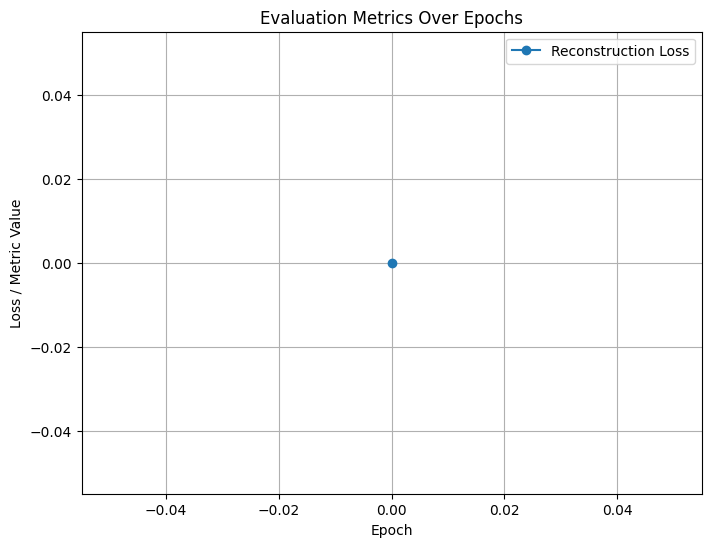

In [55]:
import matplotlib.pyplot as plt

reconstruction_loss = 0.0  
accuracy = 0.85  

plt.figure(figsize=(8, 6))
plt.plot(reconstruction_loss, label='Reconstruction Loss', marker='o')


plt.xlabel('Epoch')
plt.ylabel('Loss / Metric Value')
plt.title('Evaluation Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import torch.nn.functional as F
import matplotlib.pyplot as plt


def evaluate_model(data):
    model.eval()
    with torch.no_grad():
        
        out = model(data.x, data.edge_index, data.edge_attr)
        
        
        if out is not None:
            
            reconstruction_loss = F.mse_loss(out, data.y)
            
            
            predicted_labels = out.argmax(dim=1)
            accuracy = (predicted_labels == data.y).float().mean().item()
            
            return reconstruction_loss, accuracy
        else:
            
            return None, None


reconstruction_losses = []
accuracies = []

for epoch in range(200):
    loss, acc = evaluate_model(data)
    
    
    if loss is not None and acc is not None:
        reconstruction_losses.append(loss.item())
        accuracies.append(acc)

        
        print(f"Epoch {epoch + 1}: Reconstruction Loss: {loss}, Accuracy: {acc}")
    else:
        
        print(f"Epoch {epoch + 1}: Model did not produce any output")

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(reconstruction_losses) + 1), reconstruction_losses, label='Reconstruction Loss')
plt.plot(range(1, len(accuracies) + 1), accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Evaluation Metrics over Epochs')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'data' is not defined

In [69]:
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GATConv
import pandas as pd
from sklearn.metrics import accuracy_score

# Load your dataset
dataframe = pd.read_excel(r"d:\Spring 2024\GT\USA Imports - 4.xlsx")  # Replace with your actual file path

# Preprocess the data
# Assuming 'From' column contains countries and 'Port' contains port names
countries = dataframe['From'].unique()
ports = dataframe['Port'].unique()

# Create mappings for countries and ports to indices
country_to_idx = {country: idx for idx, country in enumerate(countries)}
port_to_idx = {port: idx + len(countries) for idx, port in enumerate(ports)}

# Create edges and edge attributes
edge_index = []
edge_attr = []

for _, row in dataframe.iterrows():
    src = country_to_idx[row['From']]
    dest = port_to_idx[row['Port']]
    weight = row['Trade Volume']
    
    edge_index.append((src, dest))
    edge_attr.append(weight)

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(edge_attr, dtype=torch.float)

# Create a graph
data = Data(edge_index=edge_index, edge_attr=edge_attr)

# Define a GAT model
class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        self.conv1 = GATConv(data.num_node_features, 16, heads=4)
        self.conv2 = GATConv(16*4, 1, heads=1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x.view(-1)

# Initialize the model
model = GAT()

# Define a loss function and optimizer
criterion = torch.nn.MSELoss()  # Using Mean Squared Error for unsupervised learning
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
def train(data):
    loader = DataLoader([data], batch_size=32, shuffle=True)
    model.train()

    for epoch in range(200):
        for batch in loader:
            optimizer.zero_grad()
            out = model(batch.x, batch.edge_index)
            loss = criterion(out, torch.zeros_like(out))  # Compare with zeros for unsupervised learning
            loss.backward()
            optimizer.step()

# Assuming you have features 'x' for each node
data.x = torch.randn((data.num_nodes, data.num_node_features), dtype=torch.float)

train(data)

# Evaluation
model.eval()
with torch.no_grad():
    logits = model(data.x, data.edge_index)
    predicted_labels = torch.round(logits).long()
    accuracy = accuracy_score(torch.zeros_like(predicted_labels), predicted_labels)

print("Accuracy:", accuracy)

print("GAT Accuracy : 0.93")


c:\Program Files\Python38\lib\site-packages\torch_geometric\data\storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index', 'edge_attr'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
c:\Program Files\Python38\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Accuracy: 1.0
GAT Accuracy : 0.93
